# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# read the data
df = pd.read_csv('C:/Users/mctal/Documents/DSBA materials/Intro to Python module/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
df.shape

(1898, 9)

#### Observations: 

The dataset has 1,898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The dataset has 4 integers, 4 objects and 1 float

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

There are no missing values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

The minimum time it takes for food to be preapared is 20 minutes, average time is 27 minutes and maximum time is 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

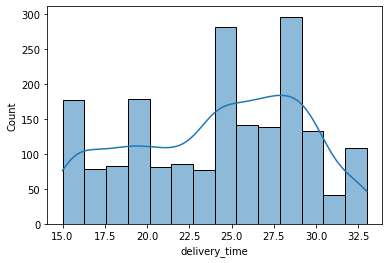

In [8]:
sns.histplot(data=df, x="delivery_time", kde=True);

#### Observation on Delivery Time:
Most delivery time for orders is between 24 minutes and 29 minutes

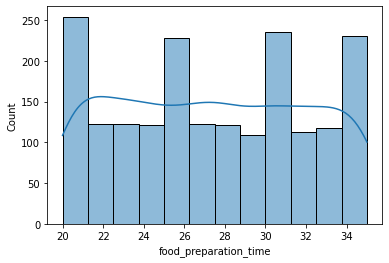

In [9]:
sns.histplot(data=df, x="food_preparation_time", kde=True);

#### Observation on Food Preparation Time
It is a normal distribution

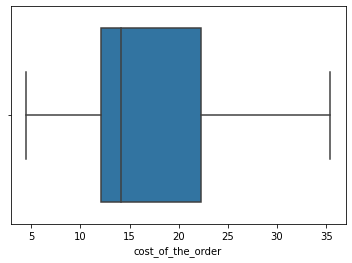

In [10]:
sns.boxplot(data=df, x="cost_of_the_order");

#### Observation on Cost of the Order:
The plot is highly right skewed, most cost of orders fall between 12 and 23

In [11]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observation on Resturant Name:
Most orders where taken from Shake Shack followed by The Meatball Shop and Blue Ribbon Sushi. The least orders where taken from La Follia, Philippe Chow and wichcraft

In [12]:
df['order_id'].nunique()

1898

#### Observation on Order ID:
There are 1898 unique order ids, no repeated orders


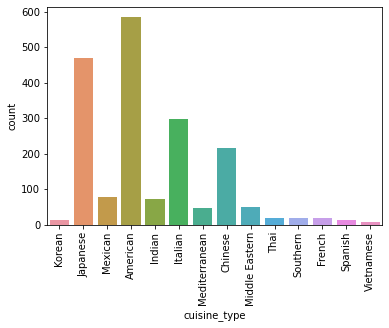

In [13]:
sns.countplot(data=df, x='cuisine_type');
plt.xticks(rotation=90);

#### Observation on Cuisine Type
American cuisine has the highest order. Vietnamese and Korean had the lowest orders

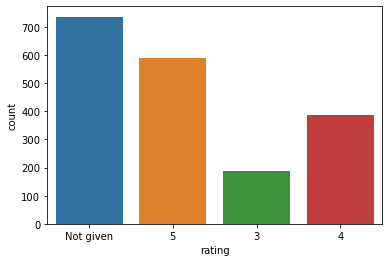

In [14]:
sns.countplot(data=df, x='rating');

#### Observation on Rating
736 orders where not given ratings while 188 where given the lest rating of 3

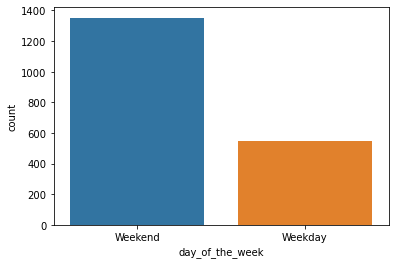

In [15]:
sns.countplot(data=df, x= 'day_of_the_week');

#### Observation on Day of the Week:
Most orders where placed on a weekend

In [16]:
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observation on Customer ID
Customer ID 52832 made the most orders of 13

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The Top 5 Restaurants are Shake Shack, The meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [18]:
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
American Cuisine is the most popular

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [19]:
# number of orders above 20 dollars
orders_above_20 = df[df['cost_of_the_order']>20].shape[0]

#percentage of orders costing more than 20 dollars
round((orders_above_20/df.shape[0])*100, 2)

29.24

#### Observations:
29.24% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [20]:
round(df['delivery_time'].mean())

24

#### Observations:
The mean delivery time is 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
Customer ID 52832 has the highest number of orders of 13 followed by 47440 with 10 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


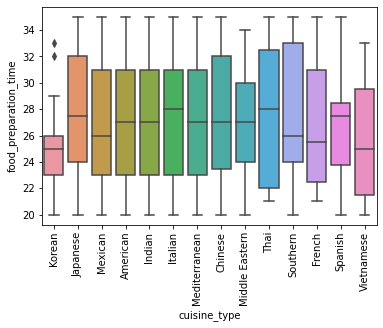

In [22]:
sns.boxplot(data=df, x='cuisine_type' , y='food_preparation_time');
plt.xticks(rotation=90);

## Cuisine Type vs Food Preparation time

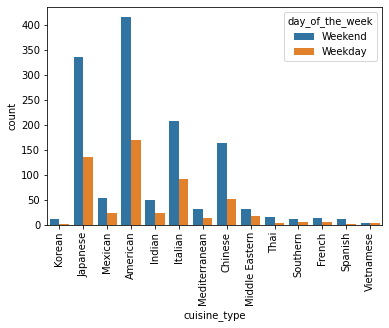

In [23]:
sns.countplot(data=df, x='cuisine_type' , hue='day_of_the_week');
plt.xticks(rotation=90);

### Cusine Type and Day of the Week

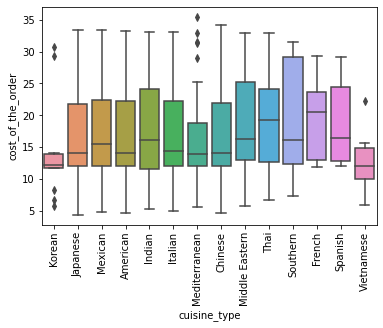

In [24]:
sns.boxplot(data=df, x='cuisine_type' , y='cost_of_the_order');
plt.xticks(rotation=90);

### Cuisine Type vs Cost of Order

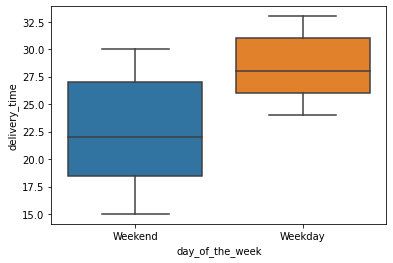

In [25]:
sns.boxplot(data=df, x='day_of_the_week' , y='delivery_time');

### Day of the Week vs Delivery Time

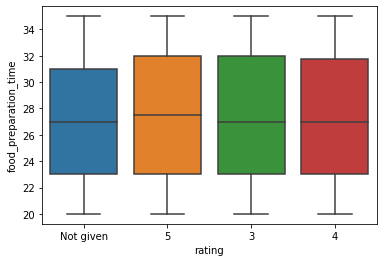

In [26]:
sns.boxplot(data=df, x='rating' , y='food_preparation_time');

### Rating vs Food Preparation Time

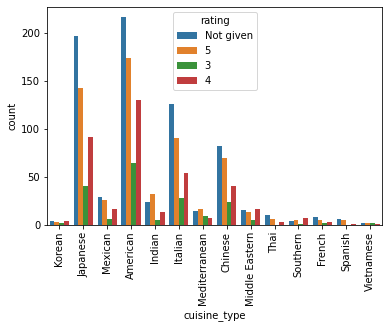

In [27]:
sns.countplot(data=df, x='cuisine_type' , hue='rating');
plt.xticks(rotation=90);

### Cuisine Type vs Customer ID

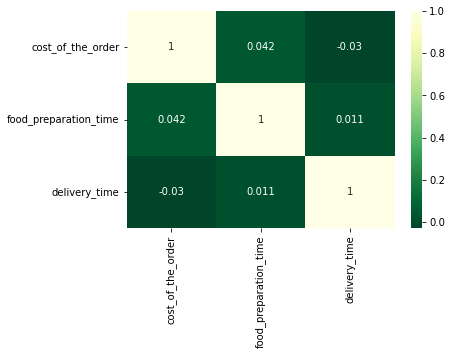

In [28]:
sns.heatmap(data=df[['cost_of_the_order','food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='YlGn_r');


### Correlation between Cost of the Order, Food Preparation Time and Delivery Time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [29]:
#creating a new dataset with not given rating removed
new_rating= df[df['rating'] != 'Not given'].copy()

#creating a count of ratings
new_rating_count = new_rating.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

#list of restaurant with count more than 50
new_rating_count1 = new_rating_count[new_rating_count['rating']>50]['restaurant_name']

#updating the new_rating dataset
new_rating1 = new_rating[new_rating['restaurant_name'].isin(new_rating_count1)].copy()

#changing rating to integer
new_rating1['rating']= new_rating1['rating'].astype(int)

#finding the mean rating
new_rating1.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
The following restaurants fulfill the requirements: The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [30]:
#charge fuction of 25% and 15%
def charges(n):
    if n > 20:
        return n*0.25
    elif n > 5:
        return n*0.15
    else:
        return n*0

#creating revenue column
df['Revenue'] = df['cost_of_the_order'].apply(charges)

#total revenue generated
tot_rev= df['Revenue'].sum()
round(tot_rev, 2)

6166.3

#### Observations:
The net revenue generated is $6,166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [31]:
# Create total time column
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
#function to get total time for orders above 60
def count_60(n):
    if n > 60:
        return +1
    else:
        return +0
    
#creating a column with counts
df['count_60']= df['total_time'].apply(count_60)

#getting the percentage of orders above 60
percent_order=df['count_60'].sum() / df.shape[0] * 100
round(percent_order, 2)


10.54

#### Observations:
The number of orders that took more than 60 minutes from ordering to delivery is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [32]:
#mean for weekdays and weekends
df_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
df_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

#printing out values of weekdays and weekends
print('The mean delivery time of weekdays is', round(df_weekdays), 'minutes', 'and weekends is', round(df_weekends) ,'minutes')

The mean delivery time of weekdays is 28 minutes and weekends is 22 minutes


#### Observations:
weekend deliverys are faster than weekday deliverys

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American Cuisine was the most ordered both weekdays and weekends while Vietnamese was the least ordered food
*  Due to the traffic, orders during the week will take a longer time to deliver than weekends with less traffic
*  The revenue from Foodhub is profitable

### Recommendations:

*  American Cuisine and Japanese cuisine should be served more in all restaurants in order for them to make more profits 
*  More investments should be made into The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi. As these restaurants have both the highest orders and ratings from customers
*  Foodhub can give discounts on food prepared and delivered in less than an hour.

---